In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [254]:
class Mandelbrot():
    def __init__(self, mode='mandelbrot', c=(-0.79 + 0.15j), x_ran=[-2, 1], y_ran=[-1.5, 1.5], npts=1000, threshold=300):
        self.mode = mode
        self.c = c if self.mode=='julia' else _
        self.x_ran = x_ran
        self.y_ran = y_ran
        self.npts = npts
        self.threshold = threshold

        x_min, x_max = self.x_ran
        y_min, y_max = self.y_ran

        x_len = abs(x_max - x_min)
        y_len = abs(y_max - y_min)

        x_arr = np.linspace(x_min, x_max, self.npts)
        y_arr = np.linspace(y_min, y_max, int(self.npts*y_len/x_len))

        self.grid = np.array([x_arr + y*1j for y in reversed(y_arr)])
        self.colorchart = np.zeros(self.grid.shape)

        self.mandelbrot()
        print('Object initialised, plotting result...')
        self.plot()

    def iteration(self, z, c):
        for j in range(self.threshold):
            z = z**2 + c
            if np.isnan(abs(z)):
                return False, j
        return True, 0
    
    def mandelbrot(self):
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                if self.mode == 'mandelbrot':
                    flag, pt_color = self.iteration(complex(0,0), self.grid[i,j])
                    self.colorchart[i,j] = pt_color
                elif self.mode == 'julia':
                    flag, pt_color = self.iteration(self.grid[i,j], self.c)
                    self.colorchart[i,j] = pt_color
    
    def plot(self, save=False, format='png', cmap='prism', axis='off', figsize=None, dpi=100):
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        ax.imshow(self.colorchart, origin='upper', cmap=cmap, aspect='equal')
        ax.axis(axis)
        plt.show()
        if save:
            filename = str(f'{self.mode}{self.c}_{self.npts}pts_{dpi}dpi').replace('.',',')
            fig.savefig('images/'+filename+f'.{format}', format=format, dpi=fig.dpi, bbox_inches='tight', pad_inches=0)



/var/folders/3p/sfv68y0d48x7855k_3bdlj8w0000gn/T/ipykernel_69831/1085133392.py:28: RuntimeWarning: overflow encountered in cdouble_scalars
  z = z**2 + c
/var/folders/3p/sfv68y0d48x7855k_3bdlj8w0000gn/T/ipykernel_69831/1085133392.py:28: RuntimeWarning: invalid value encountered in cdouble_scalars
  z = z**2 + c


Object initialised, plotting result...
(666, 1000)


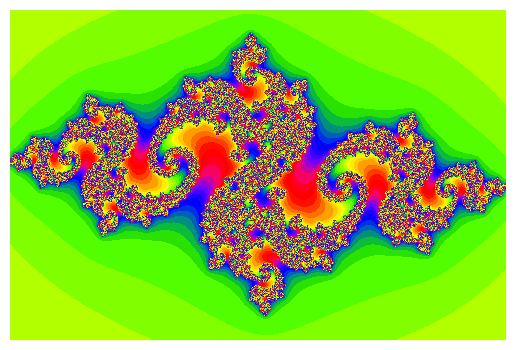

In [255]:
man = Mandelbrot(mode='julia', x_ran=[-1.5,1.5], y_ran=[-1,1])

(666, 1000)


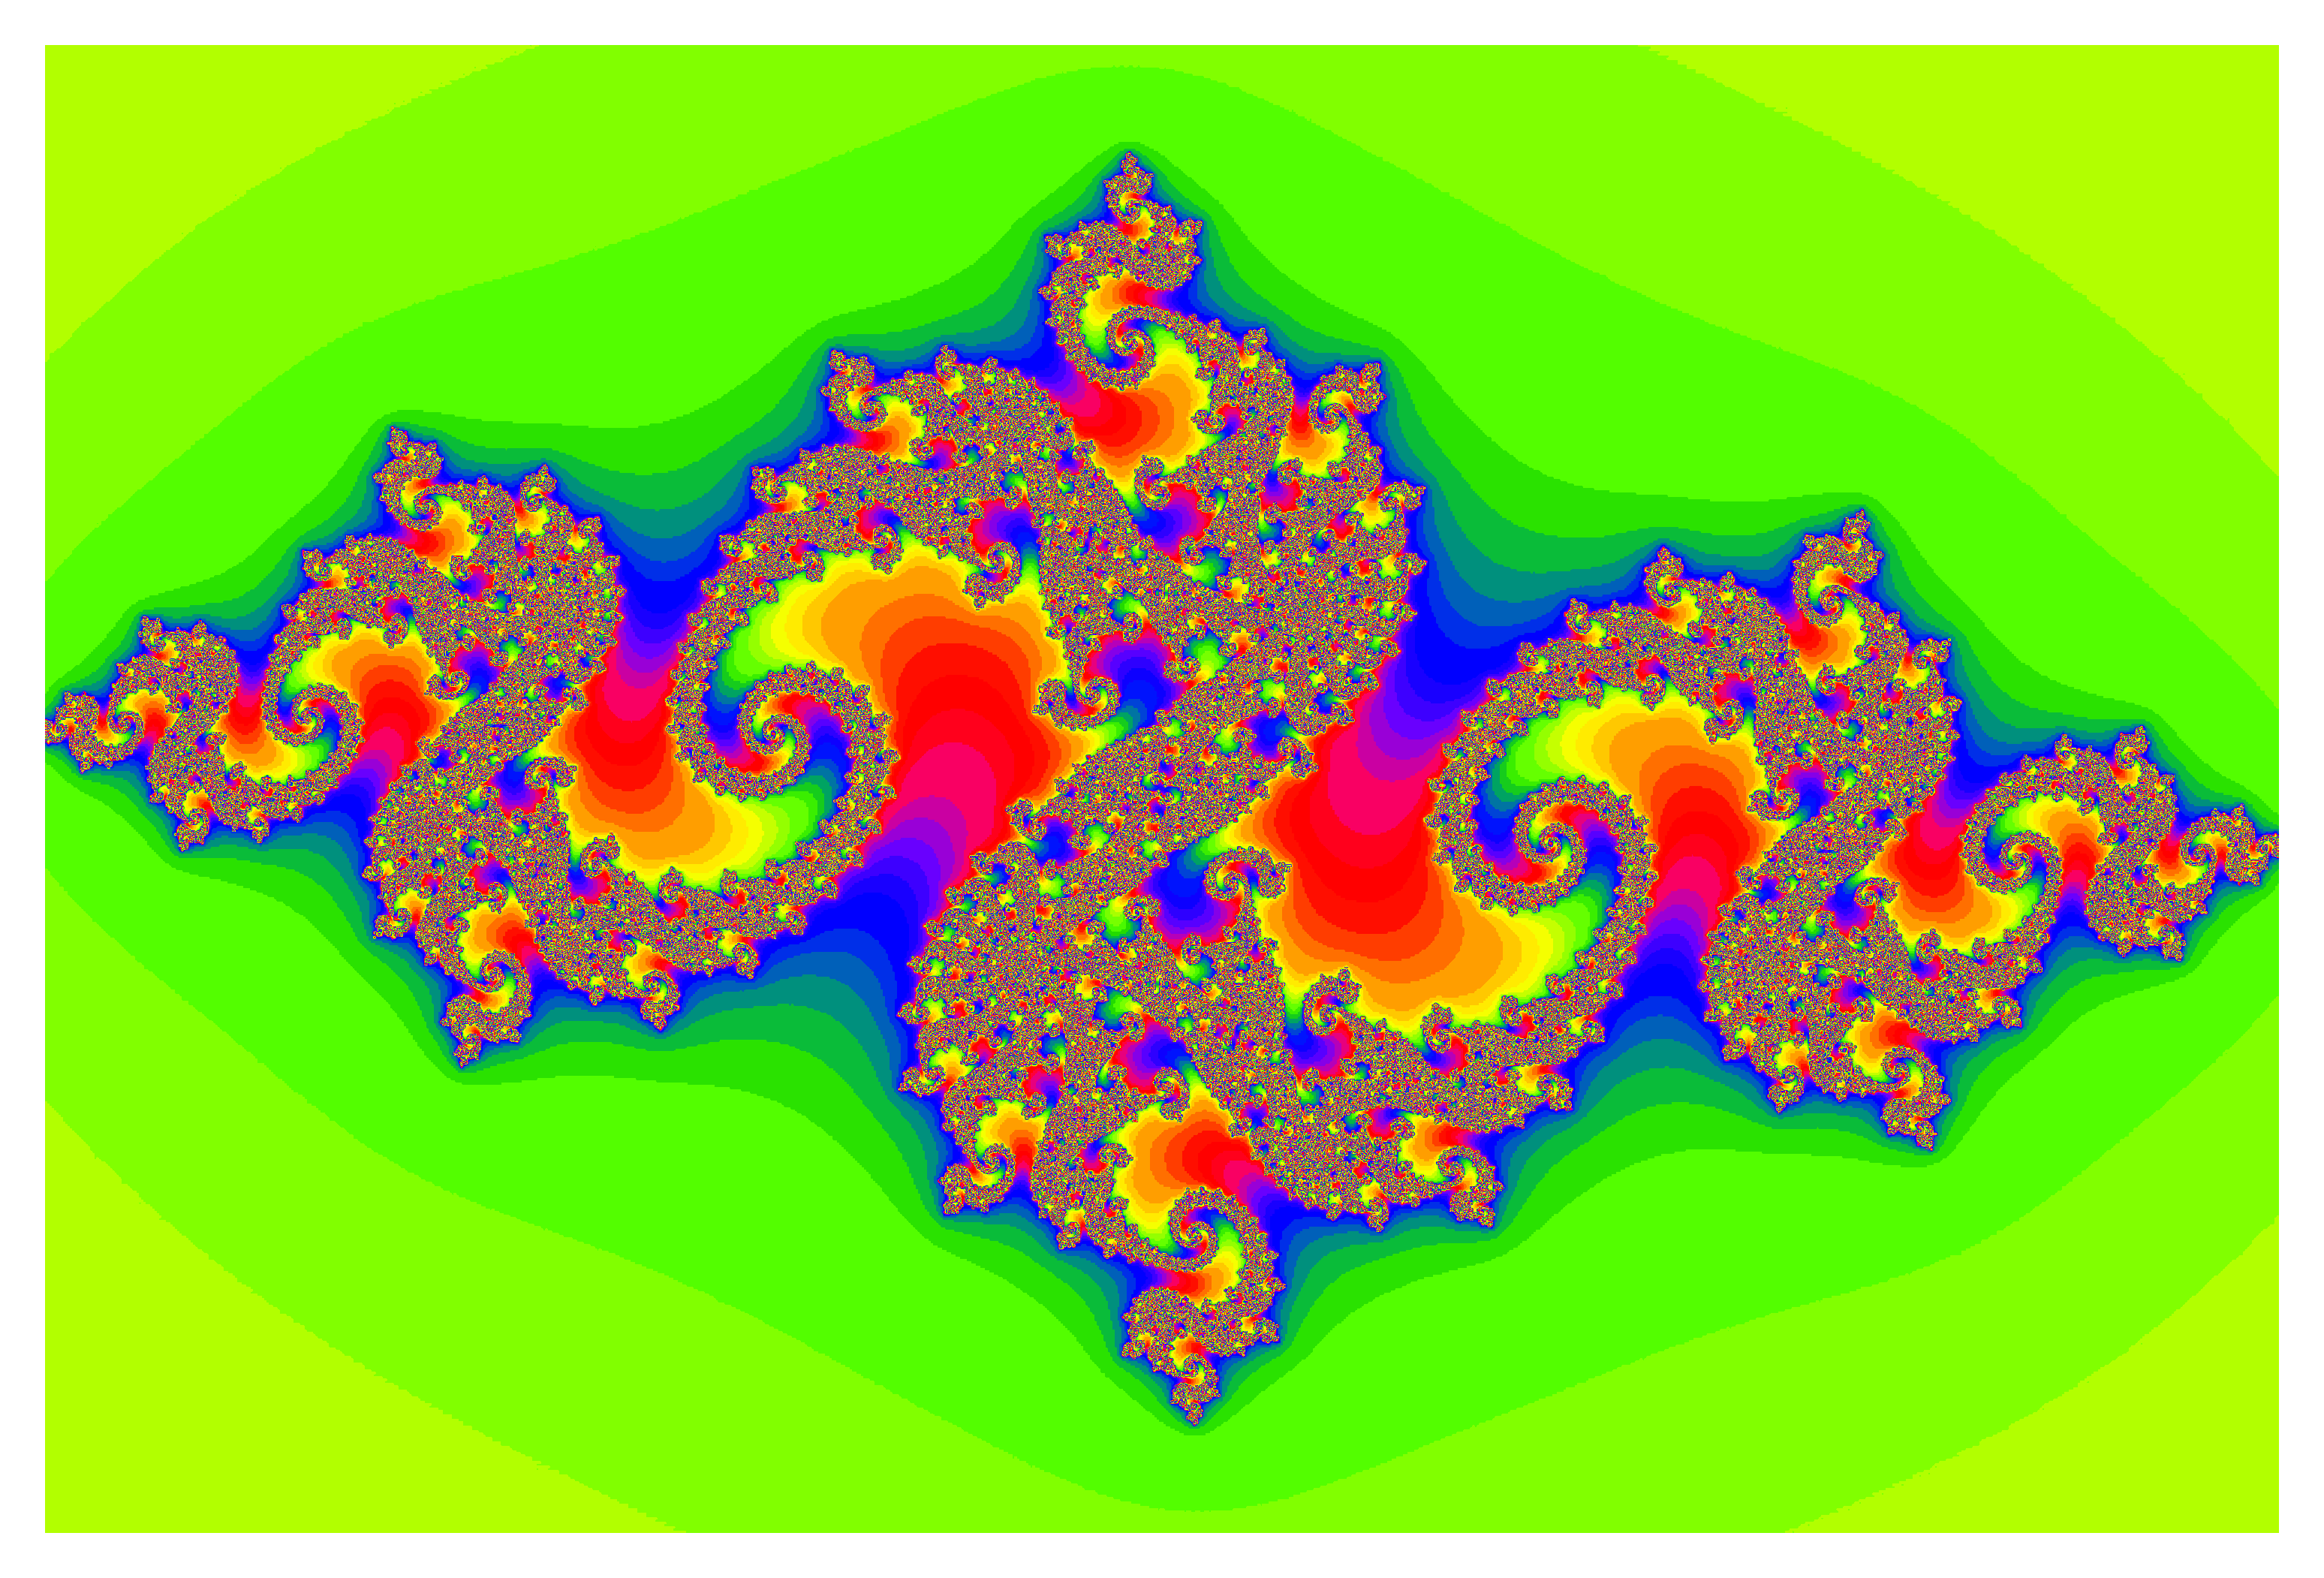

In [224]:
man.plot(dpi=600, save=True)

/var/folders/3p/sfv68y0d48x7855k_3bdlj8w0000gn/T/ipykernel_69831/1085133392.py:28: RuntimeWarning: overflow encountered in cdouble_scalars
  z = z**2 + c
/var/folders/3p/sfv68y0d48x7855k_3bdlj8w0000gn/T/ipykernel_69831/1085133392.py:28: RuntimeWarning: invalid value encountered in cdouble_scalars
  z = z**2 + c


Object initialised, plotting result...
(1000, 1000)


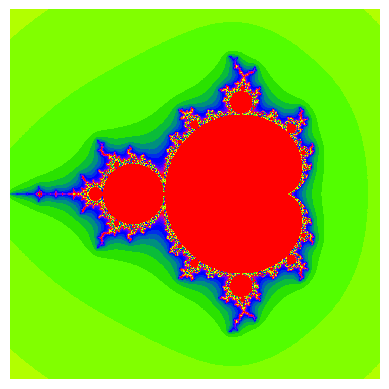

(1000, 1000)


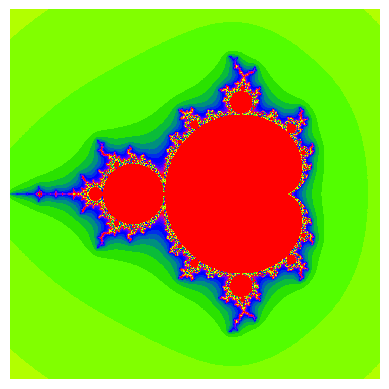

In [258]:
man2 = Mandelbrot()
man2.plot(save=True)